In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pickle

C:\Users\andre\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 1. Loading Dataset

In [2]:
path = r'C:/Users/andre/OneDrive/Documenti/GitHub/winter_exam_22_23/development.csv'
df_development = pd.read_csv(path)
df_development

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,vnljypgejkINbBAY,decrease,volume,native,English (United States),English (United States),male,22-40
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40


In [3]:
#Evlauate balancement of dataset
df_development.action.value_counts(), df_development.object.value_counts()

(increase           3823
 decrease           3575
 change language    1113
 activate            791
 deactivate          552
 Name: action, dtype: int64,
 volume    5000
 heat      2398
 none      1113
 music      791
 lights     552
 Name: object, dtype: int64)

### Evaluate all the existing combinations in the dataset

In [4]:
#Evaluate all the existing combinations in the dataset
df_increase = df_development[df_development['action']=='increase']
df_increase.object.value_counts()

volume    2614
heat      1209
Name: object, dtype: int64

In [5]:
df_increase

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
6,6,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/6a1cd...,2BqVo8kVB2Skwgyb,increase,heat,advanced,English (United States),English (United States),female,22-40
7,7,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/72160...,2BqVo8kVB2Skwgyb,increase,heat,advanced,English (United States),English (United States),female,22-40
16,16,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/256b2...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
...,...,...,...,...,...,...,...,...,...,...
9829,9829,dsl_data/audio/speakers/Pz327QrLaGuxW8Do/37824...,Pz327QrLaGuxW8Do,increase,heat,native,English (United States),English (United States),female,22-40
9837,9837,dsl_data/audio/speakers/Pz327QrLaGuxW8Do/98546...,Pz327QrLaGuxW8Do,increase,volume,native,English (United States),English (United States),female,22-40
9838,9838,dsl_data/audio/speakers/Pz327QrLaGuxW8Do/a1b55...,Pz327QrLaGuxW8Do,increase,volume,native,English (United States),English (United States),female,22-40
9842,9842,dsl_data/audio/speakers/Pz327QrLaGuxW8Do/1e8a9...,Pz327QrLaGuxW8Do,increase,heat,native,English (United States),English (United States),female,22-40


In [6]:
#Evaluate all the existing combinations in the dataset
df_decrease = df_development[df_development['action']=='decrease']
df_decrease.object.value_counts()

volume    2386
heat      1189
Name: object, dtype: int64

In [7]:
#Evaluate all the existing combinations in the dataset
df_change_language = df_development[df_development['action']=='change language']
df_change_language.object.value_counts()

none    1113
Name: object, dtype: int64

In [8]:
#Evaluate all the existing combinations in the dataset
df_activate = df_development[df_development['action']=='activate']
df_activate.object.value_counts()

music    791
Name: object, dtype: int64

In [9]:
#Evaluate all the existing combinations in the dataset
df_deactivate = df_development[df_development['action']=='deactivate']
df_deactivate.object.value_counts()

lights    552
Name: object, dtype: int64

Combinations of actions expressed by humans in the dataset found are the following:
1. increase volume
2. increase heat
3. decrease volume
4. decrease heat
5. change language
6. activate music
7. deactivate lights

According to this, starting from this dataset a new one can be generated containing the audio file with the corresponding label aside referring to the desired action.

### Creating new training dataset
Add a column called labels where in correspondance of each combination has the respective label (ex. if the row has action=increase and object=heat has label 1)

In [10]:
#df_development_increase_volume = df_development.loc[(df_development['action'] == 'increase') & (df_development['object'] == 'volume')]
df_development['labels']=0

#df_development_increase_volume = df_development.loc[(df_development['action'] == 'increase') & (df_development['object'] == 'volume')]
df_development.loc[(df_development['action'] == 'increase') & (df_development['object'] == 'volume'), 'labels']=1
df_development.loc[(df_development['action'] == 'increase') & (df_development['object'] == 'heat'), 'labels']=2

df_development.loc[(df_development['action'] == 'decrease') & (df_development['object'] == 'volume'), 'labels']=3
df_development.loc[(df_development['action'] == 'decrease') & (df_development['object'] == 'heat'), 'labels']=4

df_development.loc[(df_development['action'] == 'change language') & (df_development['object'] == 'none'), 'labels']=5

df_development.loc[(df_development['action'] == 'activate') & (df_development['object'] == 'music'), 'labels']=6
df_development.loc[(df_development['action'] == 'deactivate') & (df_development['object'] == 'lights'), 'labels']=7

df_development
#df_development.labels.value_counts() #check

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange,labels
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,5
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40,6
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40,7
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,1
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,1
...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,vnljypgejkINbBAY,decrease,volume,native,English (United States),English (United States),male,22-40,3
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,7
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,7
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,7


Now to generate a new dataset with recording and corresponding label assigned we need to extract every audio file looking ath the path column

In [11]:
path_working_directory = r'C:/Users/andre/OneDrive/Documenti/GitHub/winter_exam_22_23'
paths_recordings = df_development['path']

In [12]:
# signals = []
# sample_rates = []

# for path in paths_recordings:
#     file_path = f'{path_working_directory}/{path}'
    
#     signal, sr = librosa.load(file_path)
    
#     signals.append(signal)
#     sample_rates.append(sr)
    

In [13]:
# labels = df_development['labels']
# df = []
# df.append(paths_recordings)
# df.append(signals)
# df.append(sample_rates)
# df.append(labels)

In [14]:
# df=[]
# name_file = r'/df.pickle'
# print( path_working_directory+name_file)
# with open(path_working_directory+name_file, "wb") as output_file:
#     pickle.dump(df, output_file)

In [15]:
name_file = r'/df.pickle'

with open(path_working_directory+name_file, 'rb') as f:
        df = pickle.load(f)
df


[0       dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...
 1       dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...
 2       dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...
 3       dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...
 4       dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...
                               ...                        
 9849    dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...
 9850    dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...
 9851    dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...
 9852    dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...
 9853    dsl_data/audio/speakers/vnljypgejkINbBAY/61b7a...
 Name: path, Length: 9854, dtype: object,
 [array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -1.9318040e-06,  3.8942535e-06,  0.0000000e+00], dtype=float32),
  array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -5.8157309e-07,  1.0317751e-06,  0.0000000e+00], dtype=float32),
  array([ 0.        ,  0.        ,  0

1.877324    525
1.792018    500
2.048027    493
1.962721    462
1.706712    448
           ... 
6.826712      1
5.120000      1
0.682721      1
6.656009      1
5.290703      1
Length: 124, dtype: int64
0       1.857642
1       1.393197
2       1.950522
3       1.764717
4       2.414875
          ...   
9849    2.730703
9850    2.645351
9851    2.645351
9852    2.304036
9853    2.816009
Length: 9854, dtype: float64


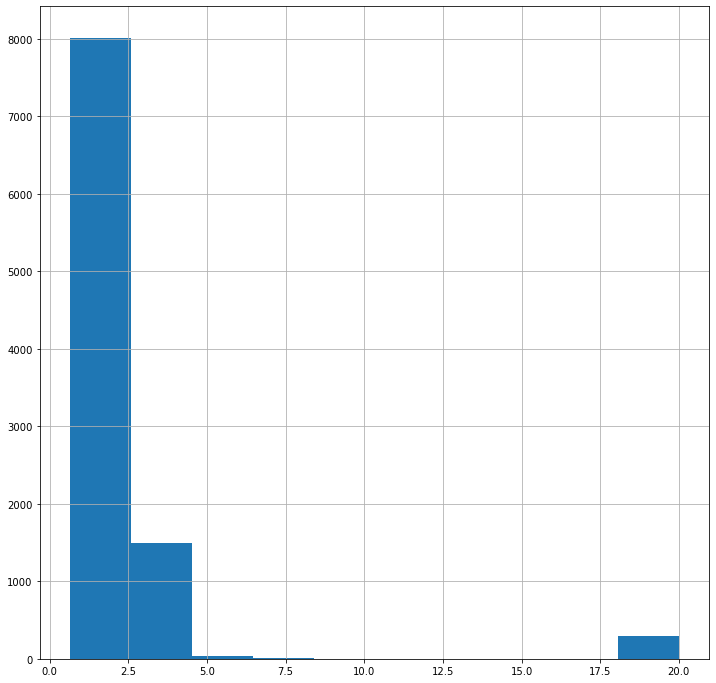

In [16]:
length_audios = []
length_audios_seconds = []
indexes = []
i = 0

for item,sr in zip(df[1], df[2]):
    length_audios.append(len(item))
    length_audios_seconds.append(len(item)/sr)
    if len(item)/sr  <=4:
        indexes.append(i)
    i = i+1
        

length_audios=pd.Series(length_audios)
length_audios_seconds = pd.Series(length_audios_seconds)
print(length_audios_seconds.value_counts())
plt.figure(figsize=(12,12))
length_audios_seconds.hist()
print(length_audios_seconds)


In [17]:
len(indexes)

9464

In [37]:
s_rates = pd.Series(df[2])
s_rates.value_counts()

22050    9854
dtype: int64

Every signal has the same sample rate of 22050.

In [38]:
sample_rate = 22050

In [39]:
indexes

length_audios_seconds[7767] #8140, 8228]
print(length_audios_seconds.value_counts().iloc[:50])
length_audios_seconds.value_counts().iloc[:50].keys().drop(20).max()
length_audios_seconds.value_counts().iloc[:50].values.sum()
#[1752, 3671, 4234, 4675, 5669, 7111, 7767, 7843, 8888]

# cnt = 0
# for i in length_audios_seconds.value_counts().keys():
    
#     if i >=4.95 and i <=5.05:
#         print(i)
#         print(cnt)
#     cnt = cnt+1

AttributeError: 'list' object has no attribute 'value_counts'

## 2. Pre-Processing

There exist 9464 audio files (-300 of 20 seconds long) whose length is below 4 seconds, since the total of samples is 9857, it seems reasonable to cut take only the files whose length is lower or equal to 4 and then, in order to obtain comparable spectogram matrixes for every audio signal, the signals that present length < 4 are zero padded in the end in order to reach all audio signal of the same length (4) so also the matrices will be of the same size.

In [19]:
length_audios = []
length_audios_seconds = []
indexes_to_drop = []
i = 0

for item,sr in zip(df[1], df[2]):
    length_audios.append(len(item))
    length_audios_seconds.append(len(item)/sr)
    if len(item)/sr > 4:
        indexes_to_drop.append(i)
    i = i+1
        



In [20]:
len(indexes_to_drop)

390

In [21]:
df_pd = pd.DataFrame({'audio':df[1], 'label':df[3]})
df_pd

,audio,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...
9849,"[0.009223618, 0.010777138, 0.009321626, 0.0099...",3
9850,"[0.00936052, 0.010867924, 0.009305291, 0.00991...",7
9851,"[0.0014334349, 0.001723074, 0.0015384919, 0.00...",7
9852,"[0.009742705, 0.011407773, 0.009794228, 0.0103...",7


In [22]:
df_pd=df_pd.drop(indexes_to_drop).reset_index(drop=True) #reset_index because we have a new df and if we want to iterate over it is simpler
df_pd

,audio,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...
9459,"[0.009223618, 0.010777138, 0.009321626, 0.0099...",3
9460,"[0.00936052, 0.010867924, 0.009305291, 0.00991...",7
9461,"[0.0014334349, 0.001723074, 0.0015384919, 0.00...",7
9462,"[0.009742705, 0.011407773, 0.009794228, 0.0103...",7


Now retireve the max length of samples characterizing audio file (should be around 4 seconds) in order to pad every other array with lower dimension til the same length in order to have all audio file of the same length.

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

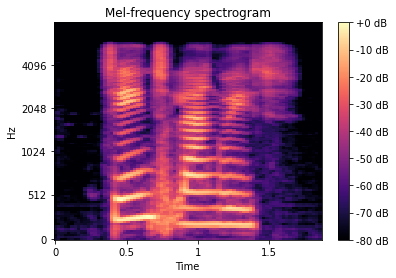

In [32]:
spectogram = librosa.feature.melspectrogram(y=df[1][0], sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spectogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

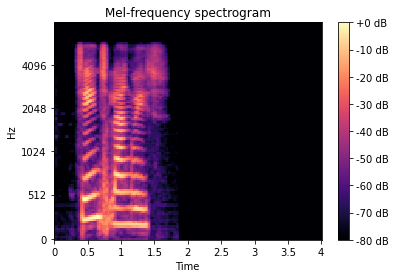

In [33]:
spectogram = librosa.feature.melspectrogram(y=np.pad(df_pd.audio[0],(0,88064- len(df_pd.audio[9463])),mode='constant', constant_values=0), sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spectogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [25]:
# Find maximum length of the audio in the dataframe
lengths = [len(audio) for audio in df_pd.audio]
# idx = 45 #check
# lengths[idx], len(df_pd.audio.iloc[idx])
lengths = pd.Series(lengths)
#lengths.max() #88064
lengths[lengths == lengths.max()]

3566    88064
4104    88064
dtype: int64

In [26]:
# def pad_audio(audio, max_length):
#     t = max_length - len(audio)
#     return np.pad(audio, pad_width=(0, t), mode='constant')

In [27]:
max_length = 88064
for i, audio in enumerate(df_pd.audio):
    
    #print(len(df_pd.audio[i]))
    #audio_padded = np.resize(df_pd.audio[i], max_length)
    df_pd.audio[i] = np.pad(df_pd.audio[i],(0,max_length- len(df_pd.audio[i])),mode='constant', constant_values=0)
    
    #print(len(df_pd.audio[i]))
#     if i == 2:
#         break

C:\Users\andre\AppData\Local\Temp/ipykernel_7728/2611756987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd.audio[i] = np.pad(df_pd.audio[i],(0,max_length- len(df_pd.audio[i])),mode='constant', constant_values=0)


In [28]:
lengths = [len(audio) for audio in df_pd.audio]
lengths = pd.Series(lengths)
lengths.value_counts()

88064    9464
dtype: int64

Test if audio has been correctly padded by checking if black background has been added on the right of the image

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

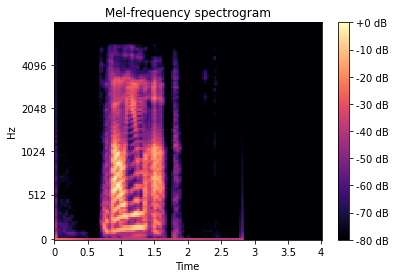

In [29]:
spectogram = librosa.feature.melspectrogram(y=df_pd.audio[9463], sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spectogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


Now that every audio signal has the same size and been correctly padded we can compute the spectogram matrix for each of them

In [42]:
spectograms = []
for i, audio in enumerate(df_pd.audio):
    spectogram = librosa.feature.melspectrogram(y=df_pd.audio[i], sr=sample_rate)
    spectograms.append(spectogram)
    #df_pd.audio['spectogram'] = spectogram
    
    #print(len(df_pd.audio[i]))
#     if i == 2:
#         break

In [45]:
df_pd['spectogram'] = spectograms

In [55]:
df_pd

,audio,label,spectogram
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,"[[9.267124e-07, 1.3667404e-06, 2.0460979e-07, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,"[[4.3717076e-08, 1.5552037e-07, 4.1438201e-07,..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,"[[8.7455555e-07, 2.0838406e-06, 2.5746444e-06,..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[[1.2592287e-09, 2.3677757e-07, 8.411498e-07, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[[1.8558798e-06, 2.2956067e-06, 1.945362e-06, ..."
...,...,...,...
9459,"[0.009223618, 0.010777138, 0.009321626, 0.0099...",3,"[[0.34729773, 0.77744186, 0.82799214, 0.762697..."
9460,"[0.00936052, 0.010867924, 0.009305291, 0.00991...",7,"[[0.34190425, 0.7967581, 0.8526704, 0.79687744..."
9461,"[0.0014334349, 0.001723074, 0.0015384919, 0.00...",7,"[[0.34684753, 0.7111303, 0.84173095, 0.7698993..."
9462,"[0.009742705, 0.011407773, 0.009794228, 0.0103...",7,"[[0.35750708, 0.82012534, 0.8560327, 0.8084261..."


In [50]:
# spectogram = librosa.feature.melspectrogram(y=df_pd.audio[0], sr=sample_rate)
# spectogram.shape

(128, 173)

In [54]:
# df_pd.spectogram[4505].shape

(128, 173)

In [23]:
# len(df[1][0])

40961

Now that we have obtained the spectogram of same dimension for every audio signal we can procede with the step of feature extraction.

## 3. Feature Extraction

For each spectogram of dimension RxC we need to divide it into a grid of rxc squares, each square will have dimensions R/r and C/c, so r and c will be hyperparameters.

Let's start by choosing r = c.

In [78]:
R, C = df_pd.spectogram[0].shape
nr = 8 #128/8 = 16 -> each square will have height of 16
nc = 8 #173/8 = 21.625 -> each square has width of 21.625 

In [68]:
means = []
stds = []

spectogram = df_pd.spectogram[0]
len(spectogram[0])
n_el_col = C//c
n_el_row = R//r

for start_r in range(0, R, nr):
    n_el_col = C//c
    for start_c in range(0, C, nc):
        square = []
        #since we have C=173 the last square will be slightly larger, more precisely we will have all squares with width
                #equal to 21: 21x8 = 168, so we should specify for the last iteration to take squares of width = 26, so 21x7 = 147
                # 147 + 26 = 173
                
                #check to see if the next iteration will be ok or not
                # if 173 - 21*(0,1,2,3,4,5,6,7, ... , nc) <= 21
                #  n_el_col = 173 - 21*7 + 
        if C - n_el_col*(start_c+1) <= n_el_col:
            n_el_col = n_el_col + C - n_el_col*(start_c+1)
            
        for i in range(start_r, start_r+n_el_row):
            for j in range(start_c, start_c+n_el_col):
                
                square.append(spectogram[i][j])
                    
                
            square.append(spectogram[i][j])
        
        

0 16.0
8 24.0
16 32.0
24 40.0
32 48.0
40 56.0
48 64.0
56 72.0
64 80.0
72 88.0
80 96.0
88 104.0
96 112.0
104 120.0
112 128.0
120 136.0


In [94]:
pd.DataFrame(spectogram)

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,9.267124e-07,1.366740e-06,2.046098e-07,1.883150e-07,6.302036e-07,8.716734e-07,3.971087e-07,5.201940e-07,1.722151e-06,2.367771e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.907570e-07,2.482167e-06,1.770311e-06,1.196842e-06,1.502629e-06,1.669656e-06,2.408240e-06,2.217255e-06,3.651772e-06,4.274992e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.252163e-07,1.292414e-06,7.606882e-07,3.236817e-07,3.495951e-07,3.752355e-07,4.629009e-07,9.153019e-07,1.852412e-06,1.476822e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.738693e-07,1.011269e-06,9.844905e-07,9.465836e-07,3.337177e-07,7.672818e-07,7.122686e-07,1.678924e-06,8.496010e-07,6.489049e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.627676e-07,1.779643e-06,3.305051e-06,1.966390e-06,1.398106e-06,1.662323e-06,1.606516e-06,1.490200e-06,1.068838e-06,1.211591e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,4.823155e-21,1.817519e-20,1.528098e-20,7.103364e-21,1.076784e-20,6.528171e-21,5.661654e-21,5.010082e-21,7.554224e-21,6.804072e-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,1.182910e-20,3.906942e-20,2.039626e-20,7.914000e-21,1.028011e-20,7.062685e-21,5.270908e-21,4.234741e-21,3.736084e-21,4.554824e-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.481680e-20,3.820273e-20,1.781847e-20,6.313084e-21,7.240784e-21,5.050348e-21,3.291390e-21,3.308453e-21,5.158477e-21,4.961136e-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,1.208758e-20,3.539556e-20,2.255616e-20,8.408864e-21,9.659720e-21,6.198088e-21,3.674493e-21,3.123252e-21,5.222395e-21,4.792506e-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
start_c = 0
n_el_row = R//r
[start_r for start_r in range(0, R, nr)]

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120]

In [92]:
[start_c for start_c in range(0, C, nc)]

[0,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 72,
 80,
 88,
 96,
 104,
 112,
 120,
 128,
 136,
 144,
 152,
 160,
 168]

In [77]:
spectogram[0:C]

array([[9.26712403e-07, 1.36674043e-06, 2.04609790e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.90757031e-07, 2.48216702e-06, 1.77031131e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.25216291e-07, 1.29241448e-06, 7.60688238e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.48168016e-20, 3.82027259e-20, 1.78184737e-20, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20875790e-20, 3.53955592e-20, 2.25561587e-20, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28327726e-20, 3.26269179e-20, 1.47909652e-20, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

## Esperimenti a caso

In [24]:
# frame = 1024
# hop = frame//2 #integer division


In [39]:
# df[2]
# s_rate=pd.Series(df[2])
# s_rate.value_counts()

for item,sr in zip(df[1], df[2]):
    print(item, sr)
    break

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.9318040e-06
  3.8942535e-06  0.0000000e+00] 22050


In [149]:
index = 23#34#1#36#126        
#length_audios[length_audios==150000]
df[1][index]
print(df[3][index])
print(len(df[1][index]))
path_audio = df_development.path[index]
path_working_directory+'/'+path_audio
ipd.Audio(path_working_directory+'/'+path_audio)

1
86016


In [20]:
length_audios.loc[(length_audios<=50000)]# & (length_audios<=100000)]


0       40961
1       30720
2       43009
3       38912
5       49153
        ...  
9841    32768
9842    24577
9843    30720
9844    30720
9845    34816
Length: 6566, dtype: int64

In [59]:
df[1][1]

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -5.8157309e-07,  1.0317751e-06,  0.0000000e+00], dtype=float32)

In [61]:
len(indexes)

7685

Trying to visualize signals of different classes to see if there exist common patterns.

In [21]:
df_development[df_development['labels']==5].head()

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange,labels
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,5
47,47,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/ce762...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,5
48,48,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/d6207...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,5
49,49,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/d8f78...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,5
50,50,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/db510...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,5


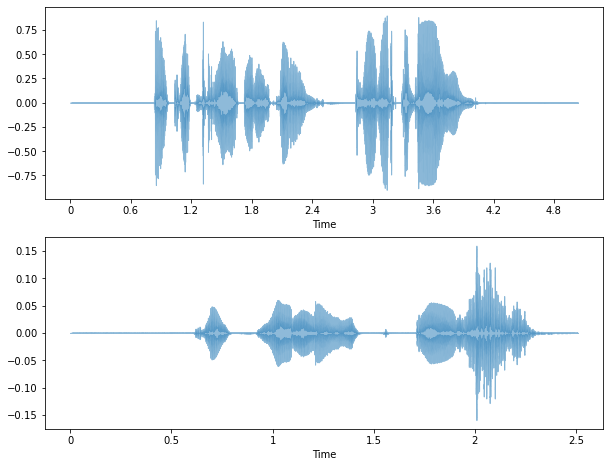

In [100]:
# index, label
#3,  1
#4,  1
#6,  2
#7,  2
#5,  3
#26, 3
#8,  4
#9,  4
#0,  5
#47, 5
#1,  6
#12, 6
#2,  7
#15, 7
plt.figure(figsize=(10, 12))

plt.subplot(3,1,1)
librosa.display.waveshow(df[1][8140], alpha=0.5)
plt.subplot(3,1,2)
librosa.display.waveshow(df[1][15], alpha=0.5)

# x = np.linspace(0, 10 - 2 * delta, 200) + delta
# fig, axs = plt.subplots(3, 7, figsize=(15,30), constrained_layout=True)
# for ax in axs:
#     ax.plot(x,df[1][3])

# plt.subplot(3,2,1)
# librosa.display.waveshow(df[1][6], alpha=0.5)
# plt.subplot(3,2,2)
# librosa.display.waveshow(df[1][7], alpha=0.5)
# small_df = []
# small_df.append(df[1][4])
# small_df

## 3.  Feature Extraction

In [25]:
spectogram = librosa.feature.melspectrogram(y=df[1][36], sr=sr)
spectogram.shape

(128, 862)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

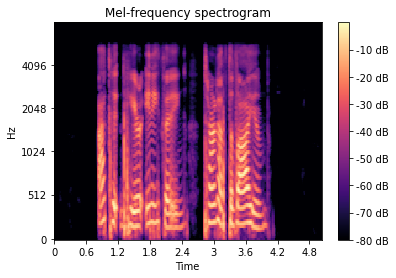

In [101]:
spectogram = librosa.feature.melspectrogram(y=df[1][8140], sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spectogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [102]:
df_spectogram = pd.DataFrame(spectogram)
df_spectogram.shape



(128, 217)

In [28]:
def compute_mean_std_spectogram(spectogram, R, C):
    
    
    
    for i in range(len(R)):
        for j in range(len(C)):
            

IndentationError: expected an indented block (Temp/ipykernel_1996/2413625022.py, line 7)

## 4. Classification